# Statistics and Rank Estimation

As we noted in the previous example, different initializations may lead to different solutions. Not only that, but changing the number of iteration and tolerance can have a big impact on the computed solutions. Given the rank $r$, we may want to explore some aspects of the CPD's computed by TensorFox. This can be done with the **stats** function. This function computes one hundred CPD's to your problem and shows some histograms so you can better analyze what is really going on. It should be noted that all these CPD's are automatically computed with default values, the user can only change the parameters 'maxiter' and 'tol'. 

Again, start defining the same tensor $T$, then run the **stats** function for $r = 2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TensorFox as tf

In [2]:
# Create and print the tensor.
m = 2
T = np.zeros((m, m, m))
for i in range(m):
    for j in range(m):
        for k in range(m):
            T[i,j,k] = i+j+k
            
Tsize = np.linalg.norm(T)            
tf.showtens(T)

[[0. 1.]
 [1. 2.]]

[[1. 2.]
 [2. 3.]]



10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %


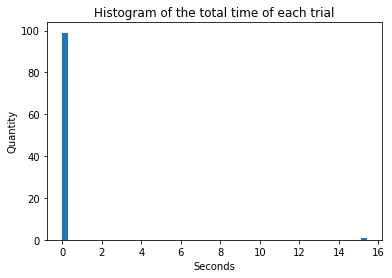

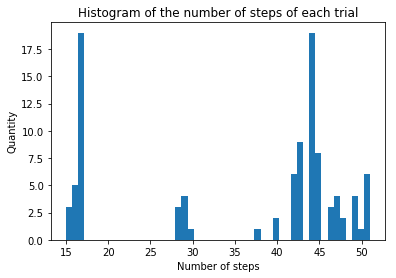

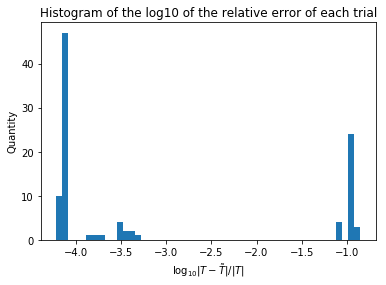

In [3]:
r = 2
times, steps, rel_errors = tf.stats(T, r)

Since this is a very simple tensor, the program is always finding the same solution, which probably is optimal. The program is doing the computation of CPD's $100$ times. Taking in account the curse of dimensionality, you can imagine how horribly long will be to run this function with a big tensor. We recommend caution when using this function, try to compute the statistics for very low ranks first, to see how long it takes. 

There are times when one really need to compute these statistics, even if this take days or weeks of computations. That is the reason for this function to exists. But, again, don't forget to be careful about the computational time. Leaving this aside, now we have enough information to understand better how the CPD behaves in general. Below we show the expected values (the means) associated with the histograms showed.

In [4]:
print('E[seconds] =', times.mean())
print()
print('E[number of steps] =', steps.mean())
print()
print('E[relative error] =', rel_errors.mean())

E[seconds] = 0.18329262256622314

E[number of steps] = 36.05

E[relative error] = 0.036003222065450924


# Rank Estimation

We already have seen how to obtain a estimate for the rank with the function **infotens**. This function show not only the rank, but also a lot more information about $T$. If you just want the rank, use the function **rank**. AS already mentioned, this function can take a long time to finish, since it computes the CPD of $T$ for several possible ranks. 

One option of **rank** not accessible with **infotens** is the option 'display'. This option is 1 by default, but **infotens** sets it to 0, so we don't have too much information on the screen. When this option is enabled the program shows a plot of the relative errors computed for each rank. There we can see if the estimate is reasonable. 

Start searching for rank
------------------------------------
Stops at r = 4  or less

Testing r = 1
Testing r = 2
Testing r = 3
------------------------------------
Estimated rank(T) = 3
|T - T_approx|/|T| = 1.2651923033280066e-06


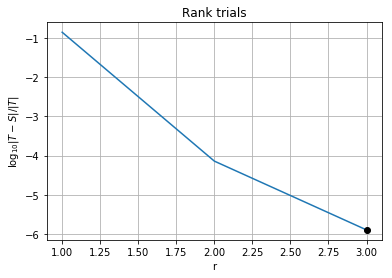

In [5]:
# Estimate rank of T.
r, error_per_rank = tf.rank(T)

The program finished and considered it to be $3$ because the difference of this error and the previous were just too small. This criterion is not the best one and this function should be taken with a grain of salt.

As a matter of fact, we know the rank of $T$ must be between $1$ and $4$. Just out of curiosity, let's see what are the errors of the CPD of $T$ for $r = 1,2,3,4$.  

In [6]:
# Compute the CPD of T for r = 1,2,3,4.
for r in [1,2,3,4]:
    print('------------------------------------------------')
    print()
    print('CPD for r =',r)
    Lambda, X, Y, Z, T_approx, info = tf.cpd(T, r)

    # Show the CPD computed. 
    print('Lambda =\n',Lambda)
    print()
    print('X =\n', X)
    print()
    print('Y =\n', Y)
    print()
    print('Z =\n', Z)
    print()

    # Show relative error of this approximation.
    print('|T - T_approx|/|T| =', info.rel_error)

------------------------------------------------

CPD for r = 1
Lambda =
 [4.84927478]

X =
 [[0.48963374]
 [0.87192821]]

Y =
 [[0.48963374]
 [0.87192821]]

Z =
 [[0.48963374]
 [0.87192821]]

|T - T_approx|/|T| = 0.14208771656239352
------------------------------------------------

CPD for r = 2
Lambda =
 [42.56670203 46.80934279]

X =
 [[0.71848395 0.69608414]
 [0.69554354 0.71796021]]

Y =
 [[0.71848395 0.69608414]
 [0.69554354 0.71796021]]

Z =
 [[-0.71848395  0.69608414]
 [-0.69554354  0.71796021]]

|T - T_approx|/|T| = 7.245341366470558e-05
------------------------------------------------

CPD for r = 3
Lambda =
 [3.05225385 1.27352813 2.14704769]

X =
 [[0.71413622 0.71399555 0.04978862]
 [0.70000676 0.70015024 0.99875978]]

Y =
 [[ 0.02051807  0.99979961  0.70015443]
 [ 0.99978948 -0.02001859  0.71399144]]

Z =
 [[ 0.43368332 -0.07898627  0.70028035]
 [ 0.90106536  0.9968757   0.71386794]]

|T - T_approx|/|T| = 7.844168883784688e-07
---------------------------------------------

After seeing these results, what you think is the correct rank of $T$?